# Predicting Rain in Australia using Logistic Regression

The study focuses on predicting rain events in Australia using a dataset that includes a variety of weather-related characteristics. The research intends to construct a prediction model by utilising machine learning techniques such as logistic regression and data preprocessing methods such as one-hot encoding for categorical variables. The goal of this model is to predict whether it will rain the next day based on previous weather data such as temperature, wind speed, humidity, and other pertinent attributes. The success of the project is dependent on attaining high prediction accuracy, which entails iteratively refining the model, considering feature engineering, hyperparameter tuning, and experimenting with different methods.

**DATASET DESCRIPTION**

**Location**: (*Categorical*) Geographic location of the weather observation.<br>
**MinTemp**: (*Numerical*) - Minimum temperature recorded.<br>
**MaxTemp**: (*Numerical*) - Maximum temperature recorded.<br>
**Rainfall**: (*Numerical*) - Amount of rainfall measured.<br>
**Evaporation**: (*Numerical*) - Evaporation rate.<br>
**Sunshine**: (*Numerical*) - Hours of sunshine.<br>
**WindGustDir**: (*Categorical*) - Direction of strongest wind gust.<br>
**WindGustSpeed**: (*Numerical*) - Speed of the strongest wind gust.<br>
**WindDir9am**: (*Categorical*) - Wind direction at 9 am.<br>
**WindDir3pm**: (*Categorical*) - Wind direction at 3 pm.<br>
**WindSpeed9am**: (*Numerical*) - Wind speed at 9 am.<br>
**WindSpeed3pm**: (*Numerical*) - Wind speed at 3 pm.<br>
**Humidity9am**: (*Numerical*) - Humidity at 9 am.<br>
**Humidity3pm**: (*Numerical*) - Humidity at 3 pm.<br>
**Pressure9am**: (*Numerical*) - Atmospheric pressure at 9 am.<br>
**Pressure3pm**: (*Numerical*) - Atmospheric pressure at 3 pm.<br>
**Cloud9am**: (*Numerical*) - Cloud cover at 9 am.<br>
**Cloud3pm**: (*Numerical*) - Cloud cover at 3 pm.<br>
**Temp9am**: (*Numerical*) - Temperature at 9 am.<br>
**Temp3pm**: (*Numerical*) - Temperature at 3 pm.<br>
**RainToday**: (*Categorical*) - Whether it rained today (Yes/No).<br>
**RainTomorrow**: (*Categorical*) - Target variable, whether it will rain tomorrow (Yes/No).<br>
**Year**: (*Numerical*) - Year of the observation.<br>
**Month**: (*Numerical*) - Month of the observation.<br>
**Day**: (*Numerical*) - Day of the month of the observation.<br>

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATA**

In [2]:
df=pd.read_csv("weatherAus.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [60]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.shape

(145460, 23)

**CHECKING NULL VALUES**

In [5]:
df.isnull().sum()/145460*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

**FILLING NULL VALUES**

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
nullcol=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [8]:
df[nullcol]=df[nullcol].fillna(df[nullcol].mean())

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
df['WindGustDir'].describe()

count     135134
unique        16
top            W
freq        9915
Name: WindGustDir, dtype: object

In [11]:
df['WindGustDir'].fillna('W',inplace=True)

In [12]:
df['WindDir9am'].describe()

count     134894
unique        16
top            N
freq       11758
Name: WindDir9am, dtype: object

In [13]:
df['WindDir9am'].fillna('N',inplace=True)

In [14]:
df['WindDir3pm'].describe()

count     141232
unique        16
top           SE
freq       10838
Name: WindDir3pm, dtype: object

In [15]:
df['WindDir3pm'].fillna('SE',inplace=True)

In [16]:
df['RainToday'].describe()

count     142199
unique         2
top           No
freq      110319
Name: RainToday, dtype: object

In [17]:
df['RainToday'].fillna('No',inplace=True)

In [18]:
df['RainTomorrow'].describe()

count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [19]:
df['RainTomorrow'].fillna('No',inplace=True)

In [20]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**VISUALIZATIONS**

In [23]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [24]:
x.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,01-12-2008,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No
1,02-12-2008,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No
2,03-12-2008,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No
3,04-12-2008,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No
4,05-12-2008,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No


<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

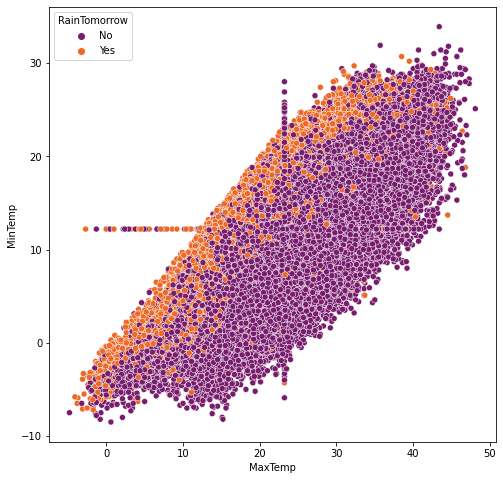

In [32]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

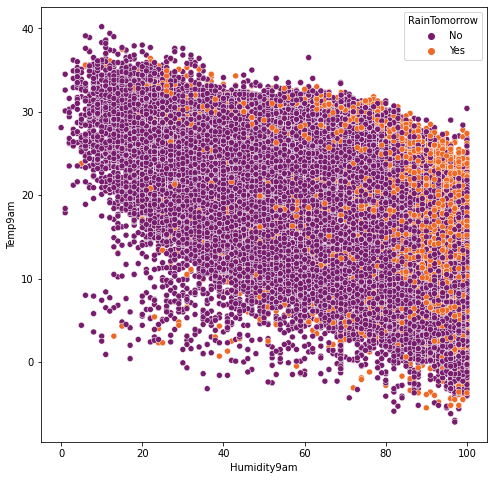

In [26]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

**HEATMAP**

<AxesSubplot:>

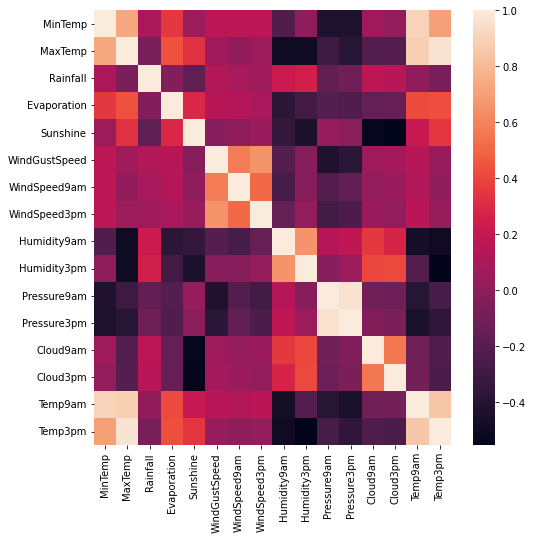

In [27]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

**LOGISTIC REGRESSION**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
x = df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [58]:
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
x_encoded = pd.get_dummies(x, columns=categorical_columns, drop_first=True)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2)
logMod = LogisticRegression()
logMod.fit(x_train, y_train)
resultPrediction = logMod.predict(x_test)

accuracy = accuracy_score(y_test, resultPrediction)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


**CONCLUSION**

This study exhibits a strong capacity to anticipate rain with an 84% accuracy rate. The model establishes a solid foundation for classification by utilising logistic regression and appropriate data preprocessing, including one-hot encoding. Potential enhancements to its performance include refining features, tweaking hyperparameters, and researching alternative algorithms. The ability to evaluate the model using numerous measures and iteratively refine the strategy based on real-world findings will be critical for long-term success.